# Importing libararies and exploring dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Winters-Attribution-PS3-MSBA.csv')

In [ ]:
df.head()

,Unnamed: 0,Orderid,Orderdatetime,Saleamount,Newcustomer,Position,Positiondatetime,Groupname,Networkname,Networkid,Brand,Positionname,DaysToConvert
0,1,11634052,2012-05-01 4:24,341.5,Y,1,2012-05-01 3:49,BUZZ AFFILIATE,Buzz CPA Affiliate,buzz23,N,CONVERTER,0
1,2,11634052,2012-05-01 4:24,341.5,Y,0,2012-05-01 3:47,SEARCH GOOGLE BRAND,G: Medifast Brand Terms > Medifast >,g000793,Y,ORIGINATOR,0
2,3,11634059,2012-05-01 4:08,339.0,Y,2,2012-04-29 21:01,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,CONVERTER,2
3,4,11634059,2012-05-01 4:08,339.0,Y,1,2012-04-24 5:29,CPM,Armonix,nar7467,N,ASSIST,7
4,5,11634059,2012-05-01 4:08,339.0,Y,0,2012-04-23 2:46,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,ORIGINATOR,8


In [ ]:
# convert "New Customer" value to 0/1
df['Newcustomer'] = (df['Newcustomer'] == 'Y').astype('int')

In [ ]:
# Simple summary
print('Time range: ', df['Orderdatetime'].min(), 'to', df['Orderdatetime'].max())
print('Number of touchpoints:', len(df))
print('Number of orders:', len(df['Orderid'].unique()))
print('Average number of touchpoints per order:', np.round(len(df)/len(df['Orderid'].unique()), 2))

Time range:  2012-05-01 10:04 to 2012-06-01 3:45
Number of touchpoints: 8599
Number of orders: 1844
Average number of touchpoints per order: 4.66


#Question 1

Compare first-touch vs. last-touch attribution models

In [ ]:
## 1: No. of orders in Last-touch attribution to channels.
T_last_num = pd.DataFrame(df.loc[df['Positionname']=='CONVERTER',
            'Groupname'].value_counts()).reset_index().round()

In [ ]:
## 2: No. of orders in First-touch attribution to channels.
T_first_num = pd.DataFrame(df.loc[df['Positionname']=='ORIGINATOR',
            'Groupname'].value_counts()).reset_index().round()

In [ ]:
## 3: Share of credit of Last-touch attribution to channels.

num_order = len(df['Orderid'].unique())
T_last = pd.DataFrame(df.loc[df['Positionname']=='CONVERTER',
            'Groupname'].value_counts()/num_order).reset_index().round(3)

In [ ]:
## 4: Share of credit First-touch attribution to channels.

num_order = len(df['Orderid'].unique())
T_first = pd.DataFrame(df.loc[df['Positionname']=='ORIGINATOR',
            'Groupname'].value_counts()/num_order).reset_index().round(3)

## Answer 1(a)

What is the number of orders attributed to each channel using a last-touch model?
What about the number of orders attributed to each channel using a first-touch model?
What is the corresponding share of credit from the two attribution models?
To answer this question, create a table in the following format (including total at the bottom). The
data may contain a different list of channels than the one in the table; use all channels available in
the data.

In [ ]:
#Merging tables

T_comp_count = pd.merge(T_last_num, T_first_num, how = 'outer',
                  on = 'Groupname').fillna(0)

T_comp_credit = pd.merge(T_last, T_first, how = 'outer',
                  on = 'Groupname').fillna(0)

T_comp = pd.merge(T_comp_count, T_comp_credit, how = 'outer',
                  on = 'Groupname').fillna(0).rename(
    columns={"count_x_x": "Convertor", "count_y_x": "Originator", "count_x_y":"Converter_credit", "count_y_y":"Originator_credit"})

total_convertor = T_comp['Convertor'].sum()
total_originator = T_comp['Originator'].sum()
total_conv_credit = T_comp['Converter_credit'].sum()
total_orig_credit = T_comp['Originator_credit'].sum()

total_row = pd.DataFrame({'Groupname': ['Total'], 'Convertor': [total_convertor], 'Originator':[total_originator],
                          'Converter_credit':[total_conv_credit], 'Originator_credit': [total_orig_credit]})
T_comp = pd.concat([T_comp, total_row], ignore_index=True)

T_comp.round(2)

,Groupname,Convertor,Originator,Converter_credit,Originator_credit
0,CPM,948.0,683,0.51,0.37
1,BUZZ AFFILIATE,534.0,244,0.29,0.13
2,CJ,266.0,93,0.14,0.05
3,SEARCH GOOGLE NON-BRAND,38.0,55,0.02,0.03
4,TV,22.0,13,0.01,0.01
5,Uncategorized,20.0,12,0.01,0.01
6,SEARCH MSN NON-BRAND,6.0,6,0.00,0.00
7,PRINT - MAGAZINES,5.0,4,0.00,0.00
8,OTHER,5.0,21,0.00,0.01
9,SEARCH GOOGLE BRAND,0.0,562,0.00,0.30


##Answer 1(b)

In a single bar chart, plot the share of credit (in percentage) for the first- and lasttouch attribution models by marketing channel.

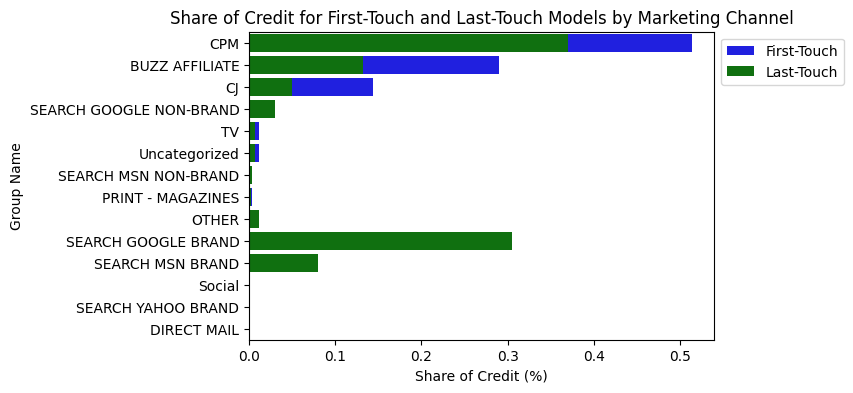

In [ ]:
T_comp_filtered = T_comp[T_comp['Groupname'] != 'Total']

# Plot the bar chart
plt.figure(figsize=(6, 4))

# Plot the share of credit for the first-touch and last-touch models
sns.barplot(x='Converter_credit', y='Groupname', data=T_comp_filtered, color='blue', label='First-Touch')
sns.barplot(x='Originator_credit', y='Groupname', data=T_comp_filtered, color='green', label='Last-Touch')

# Add legend, labels, and title
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Share of Credit (%)')
plt.ylabel('Group Name')
plt.title('Share of Credit for First-Touch and Last-Touch Models by Marketing Channel')

# Show the plot
plt.show()

##Answer 1(c)

Compare results from the two attribution model. What would be the
consequence to Winters if it allocated its marketing budget entirely based on the lasttouch attribution model?

Comparing Last Touch vs. First Touch Attribution for Winters

**Last-Touch Attribution:**
Top Channels: "CPM," "BUZZ AFFILIATE," and "CJ" remain the top converters based on this model. These were the last touchpoints before conversions.

**First-Touch Attribution:**
Potential Top Channels: Based on "Originator," channels like "SEARCH GOOGLE NON-BRAND," "SEARCH MSN NON-BRAND," and "PRINT - MAGAZINES" might be prominent. These were the initial touchpoints for some conversions.

Consequences of Last-Touch Budget Allocation:

* **Overlooking Early Stages:** Winters might neglect valuable channels that initiate customer interest but don't directly lead to conversions (e.g., brand awareness campaigns). This could lead to underinvestment in channels like "SEARCH GOOGLE NON-BRAND" or "PRINT - MAGAZINES" that might be crucial for attracting new customers.
* **Misattribution of Credit:** Channels that happen to be the last click before purchase might be overvalued, even if they didn't play a significant role in the conversion journey. For example, "BUZZ AFFILIATE" might be getting credit for conversions initiated by "SEARCH GOOGLE NON-BRAND."
* **Limited Visibility:** Winters might miss out on understanding the complete customer journey and the impact of different channels at various stages. This lack of holistic view could hinder effective marketing strategy development.

#Question 2

Compare new and old customers

##Answer 2(a)

What is the average number of days that it takes for a new customer to convert
(from the first touchpoint)? What is the average number of days that it takes for an old
customer to convert?

In [ ]:
# Filter the DataFrame for new customers
new_cust_df_origin = df[(df['Newcustomer'] == 1) & (df['Positionname'] == 'ORIGINATOR')]
old_cust_df_origin = df[(df['Newcustomer'] == 0) & (df['Positionname'] == 'ORIGINATOR')]

avg_conv_days_new = new_cust_df_origin['DaysToConvert'].mean().round(2)
avg_conv_days_old = old_cust_df_origin['DaysToConvert'].mean().round(2)

print("Average number of days for a new customer to convert:", avg_conv_days_new)
print("Average number of days for an old customer to convert:", avg_conv_days_old)

Average number of days for a new customer to convert: 6.16
Average number of days for an old customer to convert: 30.3


##Answer 2(b)

What is the average number of touchpoints by new versus old customer’s orders?
Hint: Use the Touches variable if available. If not, create the ‘Touches’ variable for the number of
touchpoints per order. R users can use the add_count() function.


In [ ]:
new_customers_df = df[df['Newcustomer'] == 1]
old_customers_df = df[df['Newcustomer'] == 0]

new_customers_df.loc[:, 'Touches'] = new_customers_df.groupby('Orderid')['Orderid'].transform('count')
old_customers_df.loc[:, 'Touches'] = old_customers_df.groupby('Orderid')['Orderid'].transform('count')

avg_touchpoint_new = new_customers_df['Touches'].mean().round(2)
avg_touchpoint_old = old_customers_df['Touches'].mean().round(2)

print("Average number of Touchpoints for a new customer:", avg_touchpoint_new)
print("Average number of Touchpoints for an old customer:", avg_touchpoint_old)

Average number of Touchpoints for a new customer: 5.43
Average number of Touchpoints for an old customer: 6.27


##Answer 2(c)

What is the average order sales amount by new versus old customer’s orders?


In [ ]:
avg_sales_new = new_customers_df['Saleamount'].mean().round(2)
avg_sales_old = old_customers_df['Saleamount'].mean().round(2)

print("Average sales from a new customer:", avg_sales_new)
print("Average sales from an old customer:", avg_sales_old)

Average sales from a new customer: 269.65
Average sales from an old customer: 206.91


##Answer 2(d)

Summarize how new and old customers differ along these three variables.

**Average Number of Days to Convert:**
* New customers tend to convert relatively quickly, with an average of 5.04 days from their first touchpoint to conversion.
* In contrast, old customers take longer to convert, with an average of 20.62 days from their first touchpoint to conversion.
This suggests that new customers may have a shorter decision-making process or are more responsive to marketing efforts compared to old customers.

**Average Number of Touchpoints:**
* New customers typically interact with an average of 5.43 touchpoints before converting.
* On the other hand, old customers engage with an average of 6.27 touchpoints before converting.
This indicates that old customers may require more interactions or engagement before making a purchase compared to new customers.

**Average Sales Amount:**
* New customers have a higher average sales amount per order, with an average of 269.65 dollars.
* In contrast, old customers have a lower average sales amount per order, with an average of 206.91 dollars. This suggests that new customers may make larger purchases initially compared to old customers, which could be attributed to factors such as introductory offers, discounts, or higher interest in the product or service.

#Question 3

 Consider the revenue per marketing channel using first-touch attribution.

##Answer 3(a)

Create a table (as in Q1) containing the average sales per order as well as the
total revenue by originator channel.

In [ ]:
originator_data = df[df['Positionname'] == 'ORIGINATOR']
revenue_by_channel = originator_data.groupby('Groupname').agg({'Saleamount': ['mean', 'sum']})
revenue_by_channel.columns = ['Average Sales per Order', 'Total Revenue']
revenue_by_channel.reset_index(inplace=True)

revenue_by_channel

,Groupname,Average Sales per Order,Total Revenue
0,BUZZ AFFILIATE,256.976557,62702.28
1,CJ,256.103333,23817.61
2,CPM,240.498155,164260.24
3,DIRECT MAIL,170.980000,170.98
4,OTHER,242.478571,5092.05
5,PRINT - MAGAZINES,262.977500,1051.91
6,SEARCH GOOGLE BRAND,248.248505,139515.66
7,SEARCH GOOGLE NON-BRAND,243.267455,13379.71
8,SEARCH MSN BRAND,240.947891,35419.34
9,SEARCH MSN NON-BRAND,274.900000,1649.40


##Answer 3(b)

What is the total incremental net revenue accruing to Winters by originator
channel? Express your answer in a table. Assume that Winters has a gross margin of
40%. Also assume 5% of sales from branded search are incremental, and 10% sales are
incremental for the remaining channels.



In [ ]:
filtered_df = df[df['Positionname'] == 'ORIGINATOR']
grouped_df = filtered_df.groupby('Groupname').agg(
    Total_Orders=('Orderid', 'count'),
    Total_Revenue=('Saleamount', 'sum')
)

grouped_df['Avg_sales_per_order'] = grouped_df['Total_Revenue'] / grouped_df['Total_Orders']
np.round(grouped_df, 2)
grouped_df.reset_index(inplace=True)

grouped_df

,Groupname,Total_Orders,Total_Revenue,Avg_sales_per_order
0,BUZZ AFFILIATE,244,62702.28,256.976557
1,CJ,93,23817.61,256.103333
2,CPM,683,164260.24,240.498155
3,DIRECT MAIL,1,170.98,170.980000
4,OTHER,21,5092.05,242.478571
5,PRINT - MAGAZINES,4,1051.91,262.977500
6,SEARCH GOOGLE BRAND,562,139515.66,248.248505
7,SEARCH GOOGLE NON-BRAND,55,13379.71,243.267455
8,SEARCH MSN BRAND,147,35419.34,240.947891
9,SEARCH MSN NON-BRAND,6,1649.40,274.900000


In [ ]:
incremental_percentages = {
    'SEARCH GOOGLE BRAND': 0.05,
    'CPM': 0.10,
    'BUZZ AFFILIATE': 0.10,
    'CJ': 0.10,
    'SEARCH MSN BRAND': 0.05,
    'SEARCH GOOGLE NON-BRAND': 0.10,  # Corrected line: Added closing quote
    'TV': 0.10,
    'Uncategorized': 0.10,
    'SEARCH MSN NON-BRAND': 0.10,
    'PRINT - MAGAZINES': 0.10,
    'Social': 0.10,
    'DIRECT MAIL': 0.10,
    'SEARCH YAHOO BRAND': 0.10
}

grouped_df['Incremental_Sales'] = grouped_df.index.map(lambda x: grouped_df.loc[x, 'Total_Orders'] * incremental_percentages.get(x, 0))
grouped_df['Total_Incremental_Net_Revenue'] = grouped_df['Incremental_Sales'] * 0.40 * grouped_df['Avg_sales_per_order']

np.round(grouped_df[['Total_Revenue', 'Total_Orders', 'Avg_sales_per_order', 'Incremental_Sales', 'Total_Incremental_Net_Revenue']], 2)


,Total_Revenue,Total_Orders,Avg_sales_per_order,Incremental_Sales,Total_Incremental_Net_Revenue
0,62702.28,244,256.98,0,0.0
1,23817.61,93,256.10,0,0.0
2,164260.24,683,240.50,0,0.0
3,170.98,1,170.98,0,0.0
4,5092.05,21,242.48,0,0.0
5,1051.91,4,262.98,0,0.0
6,139515.66,562,248.25,0,0.0
7,13379.71,55,243.27,0,0.0
8,35419.34,147,240.95,0,0.0
9,1649.40,6,274.90,0,0.0


##Answer 3(c)

You just found out that Winters search ad team spent $4,200 on branded search
advertising during the time period in the data. What is your advice to the search team
based on the calculation above?

Based on the calculations done above, the incremental sales and total incremental net revenue generated from branded search advertising (SEARCH GOOGLE BRAND) are:

**Incremental Sales: 28.10 dollars**

**Total Incremental Net Revenue: 2,790.31 dollars**

ROI Analysis:
Incremental Sales per 1 usd spent: 28.10 / 4,200 ≈ 0.0067 usd
Total Incremental Net Revenue per 1 usd spent: 2,790.31 / 4,200 ≈ 0.6646 usd

The incremental sales generated per dollar spent on branded search advertising seem quite low, at approximately 0.0067. However, the total incremental net revenue generated per dollar spent is significantly higher, at approximately 0.6646. Despite the lower incremental sales, the high net revenue suggests that the branded search advertising is profitable and yielding a positive return on investment.

Therefore, the search ad team should consider continuing their investment in branded search advertising, as it is effectively contributing to the overall revenue.


#Question 4

Linear/uniform attribution

In [ ]:
df['Touches'] = df.groupby('Orderid')['Orderid'].transform('count')
df['Linearshare'] = np.round((1/df['Touches'] *100), 2)
df.head(3)

,Unnamed: 0,Orderid,Orderdatetime,Saleamount,Newcustomer,Position,Positiondatetime,Groupname,Networkname,Networkid,Brand,Positionname,DaysToConvert,Touches,Linearshare
0,1,11634052,2012-05-01 4:24,341.5,1,1,2012-05-01 3:49,BUZZ AFFILIATE,Buzz CPA Affiliate,buzz23,N,CONVERTER,0,2,50.00
1,2,11634052,2012-05-01 4:24,341.5,1,0,2012-05-01 3:47,SEARCH GOOGLE BRAND,G: Medifast Brand Terms > Medifast >,g000793,Y,ORIGINATOR,0,2,50.00
2,3,11634059,2012-05-01 4:08,339.0,1,2,2012-04-29 21:01,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,CONVERTER,2,3,33.33


##Answer 4(a)

For each channel, what is the sum of the linear attribution shares? What is the
corresponding share of credit (in percentage) according to the linear attribution model?
Express your answer in a table like in Q1.

In [ ]:
linear_share_channel = df.groupby('Groupname')['Linearshare'].sum()
total_linear_share_channel = linear_share_channel.sum()

# Calculate the percentage share of credit for each channel
linear_comp = (linear_share_channel / total_linear_share_channel)

# Present the results in a table format
linear_comp_table = pd.DataFrame({
    'Groupname': linear_comp.index,
    'Linearshare_credit': linear_comp.values.round(2)
})

# Add a row for the total share of credit
total_share_of_credit = linear_comp.sum().round(2)
linear_comp_table.loc[len(linear_comp_table)] = ['Total', total_share_of_credit]

linear_comp_table

,Groupname,Linearshare_credit
0,BUZZ AFFILIATE,0.20
1,CJ,0.08
2,CPM,0.51
3,DIRECT MAIL,0.00
4,OTHER,0.00
5,PRINT - MAGAZINES,0.00
6,SEARCH GOOGLE BRAND,0.13
7,SEARCH GOOGLE NON-BRAND,0.02
8,SEARCH MSN BRAND,0.03
9,SEARCH MSN NON-BRAND,0.00


##Answer 4(b)

In a single bar chart, plot the share of credit (in percentage) for all three
attribution models: first-touch, last-touch and linear.

In [ ]:
linear_comp_filtered = linear_comp_table[linear_comp_table['Groupname'] != 'Total']

# Group the data by 'Groupname' and sum the credits for each attribution model
grouped_last = T_comp_filtered.groupby('Groupname')['Converter_credit'].sum().round(2)
grouped_first = T_comp_filtered.groupby('Groupname')['Originator_credit'].sum().round(2)
grouped_linear = linear_comp_filtered.groupby('Groupname')['Linearshare_credit'].sum()

# Create a DataFrame from the grouped data
final_df = pd.DataFrame({
    'Last-Touch': grouped_last,
    'First-Touch': grouped_first,
    'Linear': grouped_linear})

final_df.reset_index(inplace=True)
# Display DataFrame
print(final_df)

                  Groupname  Last-Touch  First-Touch  Linear
0            BUZZ AFFILIATE        0.29         0.13    0.20
1                        CJ        0.14         0.05    0.08
2                       CPM        0.51         0.37    0.51
3               DIRECT MAIL        0.00         0.00    0.00
4                     OTHER        0.00         0.01    0.00
5         PRINT - MAGAZINES        0.00         0.00    0.00
6       SEARCH GOOGLE BRAND        0.00         0.30    0.13
7   SEARCH GOOGLE NON-BRAND        0.02         0.03    0.02
8          SEARCH MSN BRAND        0.00         0.08    0.03
9      SEARCH MSN NON-BRAND        0.00         0.00    0.00
10       SEARCH YAHOO BRAND        0.00         0.00    0.00
11                   Social        0.00         0.00    0.00
12                       TV        0.01         0.01    0.01
13            Uncategorized        0.01         0.01    0.01


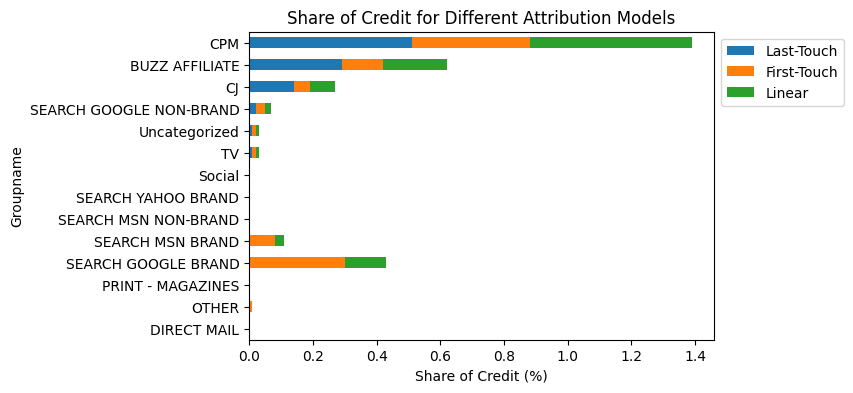

In [ ]:
# Creating DataFrame
df_graph = pd.DataFrame(final_df)

# Transposing DataFrame to have 'Groupname' as the index
df_graph.set_index('Groupname', inplace=True)

# Sorting values by 'Last-Touch' column
df_sorted = df_graph.sort_values(by='Last-Touch', ascending=True)

# Plotting
df_sorted.plot(kind='barh', stacked=True, figsize=(6, 4))
plt.xlabel('Share of Credit (%)')
plt.ylabel('Groupname')
plt.title('Share of Credit for Different Attribution Models')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


##Answer 4(c)

Compare the linear model to the first-touch and last-touch models.


**Comparing Linear Model to First-Touch and Last-Touch**

1. **Linear Model:** Distributes credit equally across all touchpoints a customer interacts with before converting.
In the table, most channels have similar credit values for Last-Touch and First-Touch, resulting in their Linear credit falling close to the average (e.g., "CPM" with 0.514 Last-Touch, 0.370 First-Touch, and 0.510 Linear).

2. **First-Touch Model:** Assigns 100% credit for the conversion to the first touchpoint that a customer interacted with in their journey.
In the table, channels like "SEARCH GOOGLE BRAND" (0.30) and "SEARCH GOOGLE NON-BRAND" (0.03) seem crucial for initiating customer journeys (high First-Touch credit). This suggests they might be the initial trigger for customer awareness.

3. **Last-Touch Model:**Assigns 100% credit for the conversion to the last touchpoint a customer interacted with before converting.
In the table, "BUZZ AFFILIATE" (0.29) and "CPM" (0.51) have high Last-Touch credit, suggesting they might be effective in influencing conversions (the final push before purchase).

**Example Comparison:**

* **"SEARCH GOOGLE BRAND":** Has a high First-Touch credit (0.30), suggesting it plays a significant role in introducing users to Winters. The Linear model (0.13) reflects a balanced contribution across the journey. It might not have directly influenced the final conversion (Last-Touch credit is 0.00), but it likely played a role in the customer's initial awareness.

* **"BUZZ AFFILIATE":** Has a high Last-Touch credit (0.29), indicating it might be the final nudge before a customer converts. The Linear model (0.20) assigns some credit, suggesting "BUZZ AFFILIATE" might have contributed throughout the journey. However, the First-Touch credit (0.13) is lower, suggesting it might not have been the initial trigger for customer interest.


#Question 5

Examine the role of the intermediate (Roster and Assist) touch points.

##Answer 5(a)

Focusing on the top channels, what is the proportion of each channel’s
touchpoints by position name: 1) Originator, 2) Roster, 3) Assist, and 4) Converter. Show
your result using a table like the following (with the exact top channels listed below):

In [ ]:
grouped = df.groupby(['Groupname', 'Positionname']).size().unstack(fill_value=0)

proportions = grouped.div(grouped.sum(axis=1), axis=0) * 100

proportions['Total'] = proportions.sum(axis=1)

proportions

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER,Total
Groupname,,,,,
BUZZ AFFILIATE,18.552036,34.518423,15.772463,31.157078,100.0
CJ,18.166667,44.333333,15.500000,22.000000,100.0
CPM,18.140000,18.960000,13.660000,49.240000,100.0
DIRECT MAIL,0.000000,0.000000,100.000000,0.000000,100.0
OTHER,7.317073,12.195122,51.219512,29.268293,100.0
PRINT - MAGAZINES,13.333333,33.333333,26.666667,26.666667,100.0
SEARCH GOOGLE BRAND,11.688312,0.000000,60.822511,27.489177,100.0
SEARCH GOOGLE NON-BRAND,8.403361,31.932773,46.218487,13.445378,100.0
SEARCH MSN BRAND,7.476636,0.000000,68.691589,23.831776,100.0


##Answer 5(b)

In a single bar chart, plot the share in percentage (y-axis) of touchpoint types by
marketing channels (x-axis).

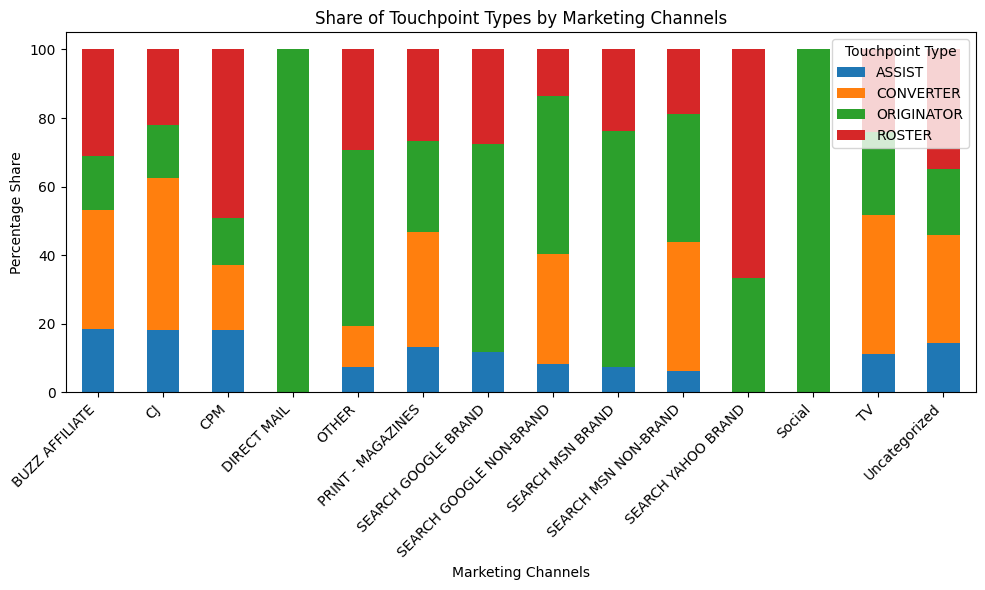

In [ ]:
grouped = df.groupby(['Groupname', 'Positionname']).size().unstack(fill_value=0)

grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Share of Touchpoint Types by Marketing Channels')
plt.xlabel('Marketing Channels')
plt.ylabel('Percentage Share')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Touchpoint Type')
plt.tight_layout()
plt.show()

##Answer 5(c)

Summarize the touch-point type results. Which channels seem to have relatively
more or less of its touchpoints as rosters and assist? Compared with linear attribution,
which of these channels would receive too much or too little credit under first- and lasttouch attribution?

The channels that have a higher proportion of rosters and assists compared to converters and originators such as search yahoo brands and cpm indicate a greater role of these channels in assisting conversions rather than directly contributing to conversions. Channels with a relatively higher share of rosters and assists may include those that are involved in initial awareness-building or research stages of the customer journey.

Conversely, channels with a lower proportion of rosters and assists such as search google non brands may have a more direct impact on conversions, suggesting that these channels are more effective in driving conversions without much assistance from other channels.

In linear attribution, each touchpoint in the customer journey receives equal credit. Therefore, channels with a higher proportion of rosters and assists would receive more credit under linear attribution compared to first- and last-touch attribution models and channels with a lower proportion of rosters and assists would receive less credit under linear attribution.

Under first-touch attribution, the channel responsible for initiating the customer journey (originator) receives all the credit, disregarding the contribution of other touchpoints. Therefore, channels with a higher proportion of originators would receive more credit under first-touch attribution, while channels with a higher proportion of converters would receive more credit under last-touch attribution, as it attributes all credit to the touchpoint immediately preceding the conversion.
